In [1]:
import sys
import pickle
import numpy as np
from numpy import array, ndarray
from pandas import read_csv, DataFrame, Series, concat
from matplotlib.pyplot import figure, savefig, show, subplots
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from scipy.stats import norm, expon, lognorm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

sys.path.insert(1, '../../../../utils')
from dslabs_functions import get_variable_types, \
  CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_bar_chart, plot_multiline_chart, plot_evaluation_results, \
  plot_horizontal_bar_chart, HEIGHT, plot_line_chart, dummify, run_NB, run_KNN, plot_multibar_chart, \
  encode_cyclic_variables, plot_confusion_matrix, NR_STDEV, determine_outlier_thresholds_for_var
from studies import naive_Bayes_study, knn_study, evaluate_approach, evaluate_and_plot 


### **Feature Selection and Generation** ###

In [2]:
lab_folder = "lab3_preparation/feat_selection_generation"
file_tag = "traffic"
task = "feat_selection_generation"
target_name = "crash_type"

# filename = "../../data/prepared/traffic_outliers_drop_outliers.csv"
# filename = "../../data/prepared/traffic_outliers_replacing_outliers.csv"
filename = "../../data/prepared/traffic_outliers_truncate_outliers.csv"

input_df = read_csv(filename, na_values="")

In [3]:
input_df.head()

,Unnamed: 0,crash_date,crash_type,intersection_related_i,damage,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,...,prim_contributory_cause_PHYSICAL CONDITION OF DRIVER,prim_contributory_cause_RELATED TO BUS STOP,prim_contributory_cause_ROAD CONSTRUCTION/MAINTENANCE,prim_contributory_cause_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,prim_contributory_cause_TEXTING,prim_contributory_cause_TURNING RIGHT ON RED,prim_contributory_cause_UNABLE TO DETERMINE,prim_contributory_cause_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"prim_contributory_cause_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",prim_contributory_cause_WEATHER
0,0,1.690636e+18,0,1,1.0,2.000000,0.0,0.000000,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
1,1,1.691885e+18,0,1,2.0,2.000000,0.0,0.000000,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2,1.639046e+18,0,1,1.0,2.855323,0.0,0.000000,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,3,1.691611e+18,1,1,2.0,2.000000,2.0,1.982157,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
4,4,1.692457e+18,0,1,1.0,2.000000,0.0,0.000000,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [7]:
from pandas import DataFrame, Index, read_csv
from dslabs_functions import (
    select_low_variance_variables,
    select_redundant_variables,
)

print("Original variables", input_df.columns.to_list())
vars2drop: list[str] = select_low_variance_variables(input_df, 3, target=target_name)
print("Variables to drop", vars2drop)

Original variables ['Unnamed: 0', 'crash_date', 'crash_type', 'intersection_related_i', 'damage', 'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour', 'crash_day_of_week', 'crash_month', 'traffic_control_device_BICYCLE CROSSING SIGN', 'traffic_control_device_DELINEATORS', 'traffic_control_device_FLASHING CONTROL SIGNAL', 'traffic_control_device_LANE USE MARKING', 'traffic_control_device_NO CONTROLS', 'traffic_control_device_NO PASSING', 'traffic_control_device_OTHER', 'traffic_control_device_OTHER RAILROAD CROSSING', 'traffic_control_device_OTHER REG. SIGN', 'traffic_control_device_OTHER WARNING SIGN', 'traffic_control_device_PEDESTRIAN CROSSING SIGN', 'traffic_control_device_POLICE/FLAGMAN', 'traffic_control_device_RAILROAD CROSSING GATE', 'traffic_control_device_RR CROSSING SIGN', 'traffic_control_device_SCHOOL ZONE', 'traffic_control_de

In [9]:

print("Original variables", input_df.columns.values)
vars2drop: list[str] = select_redundant_variables(
    input_df, target=target_name, min_threshold=0.5
)
print("Variables to drop", vars2drop)

Original variables ['Unnamed: 0' 'crash_date' 'crash_type' 'intersection_related_i' 'damage'
 'num_units' 'most_severe_injury' 'injuries_total' 'injuries_fatal'
 'injuries_incapacitating' 'injuries_non_incapacitating'
 'injuries_reported_not_evident' 'injuries_no_indication' 'crash_hour'
 'crash_day_of_week' 'crash_month'
 'traffic_control_device_BICYCLE CROSSING SIGN'
 'traffic_control_device_DELINEATORS'
 'traffic_control_device_FLASHING CONTROL SIGNAL'
 'traffic_control_device_LANE USE MARKING'
 'traffic_control_device_NO CONTROLS' 'traffic_control_device_NO PASSING'
 'traffic_control_device_OTHER'
 'traffic_control_device_OTHER RAILROAD CROSSING'
 'traffic_control_device_OTHER REG. SIGN'
 'traffic_control_device_OTHER WARNING SIGN'
 'traffic_control_device_PEDESTRIAN CROSSING SIGN'
 'traffic_control_device_POLICE/FLAGMAN'
 'traffic_control_device_RAILROAD CROSSING GATE'
 'traffic_control_device_RR CROSSING SIGN'
 'traffic_control_device_SCHOOL ZONE'
 'traffic_control_device_STOP SI

### Approach 1

Low variance variables to drop (10): ['intersection_related_i', 'damage', 'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication']

Dataset shape: (209306, 151) → (209306, 141)
Features removed: 10


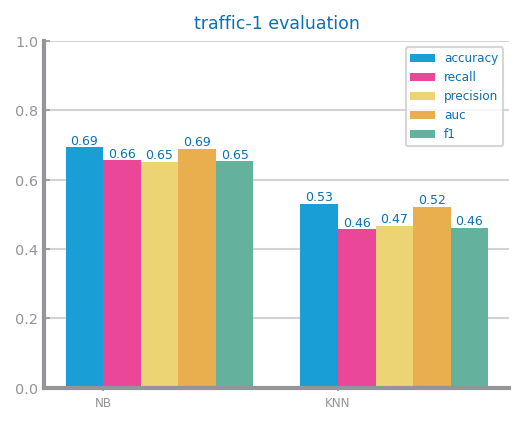

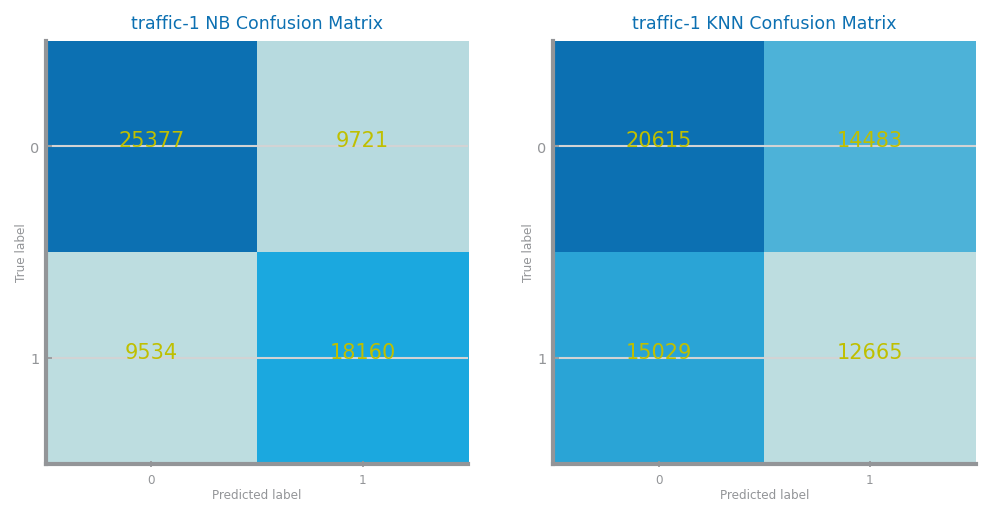

In [11]:
approach = "1"

# Approach 1: Drop low variance variables
# Low variance variables provide little discriminative power for classification

# Get variables to drop based on low variance (variance < 3)
low_var_vars2drop: list[str] = select_low_variance_variables(input_df, max_threshold=3, target=target_name)
print(f"Low variance variables to drop ({len(low_var_vars2drop)}): {low_var_vars2drop}")

# Create dataset without low variance variables
data_fs1 = input_df.drop(columns=low_var_vars2drop, inplace=False)
print(f"\nDataset shape: {input_df.shape} → {data_fs1.shape}")
print(f"Features removed: {input_df.shape[1] - data_fs1.shape[1]}")

# Evaluate
evaluate_and_plot(data_fs1, lab_folder, file_tag, approach, target_name)

### Approach 2 - Drop Redundant Variables (High Correlation)

Redundant variables to drop (10): ['injuries_total', 'injuries_non_incapacitating', 'most_severe_injury', 'injuries_reported_not_evident', 'weather_condition_RAIN', 'roadway_surface_cond_DRY', 'roadway_surface_cond_WET', 'weather_condition_CLEAR', 'lighting_condition_UNKNOWN', 'roadway_surface_cond_UNKNOWN']

Dataset shape: (209306, 151) → (209306, 141)
Features removed: 10


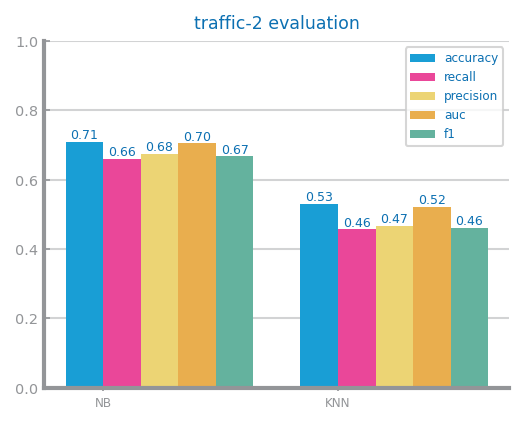

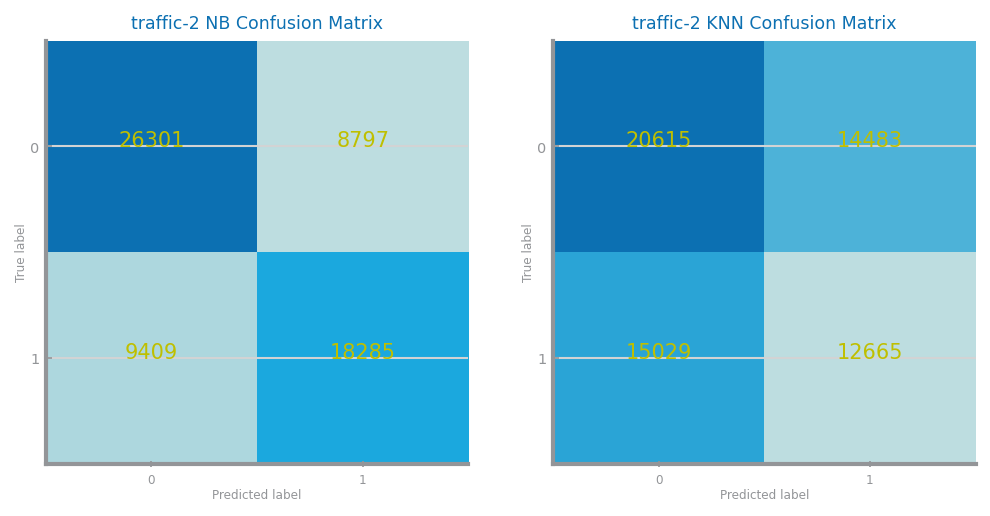

In [12]:
approach = "2"

# Approach 2: Drop redundant (highly correlated) variables
# Highly correlated variables provide redundant information

# Get variables to drop based on high correlation (correlation >= 0.5)
redundant_vars2drop: list[str] = select_redundant_variables(input_df, min_threshold=0.5, target=target_name)
print(f"Redundant variables to drop ({len(redundant_vars2drop)}): {redundant_vars2drop}")

# Create dataset without redundant variables
data_fs2 = input_df.drop(columns=redundant_vars2drop, inplace=False)
print(f"\nDataset shape: {input_df.shape} → {data_fs2.shape}")
print(f"Features removed: {input_df.shape[1] - data_fs2.shape[1]}")

# Evaluate
evaluate_and_plot(data_fs2, lab_folder, file_tag, approach, target_name)

### Approach 3 - Combined: Drop Both Low Variance and Redundant Variables

Total variables to drop (16): ['injuries_fatal', 'intersection_related_i', 'weather_condition_RAIN', 'weather_condition_CLEAR', 'lighting_condition_UNKNOWN', 'num_units', 'injuries_no_indication', 'damage', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_incapacitating', 'roadway_surface_cond_DRY', 'injuries_total', 'roadway_surface_cond_WET', 'most_severe_injury', 'roadway_surface_cond_UNKNOWN']

Dataset shape: (209306, 151) → (209306, 135)
Features removed: 16


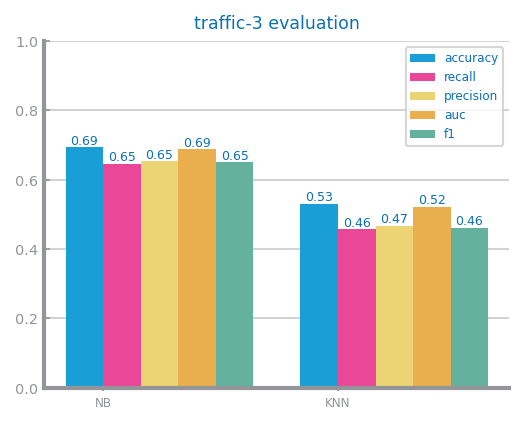

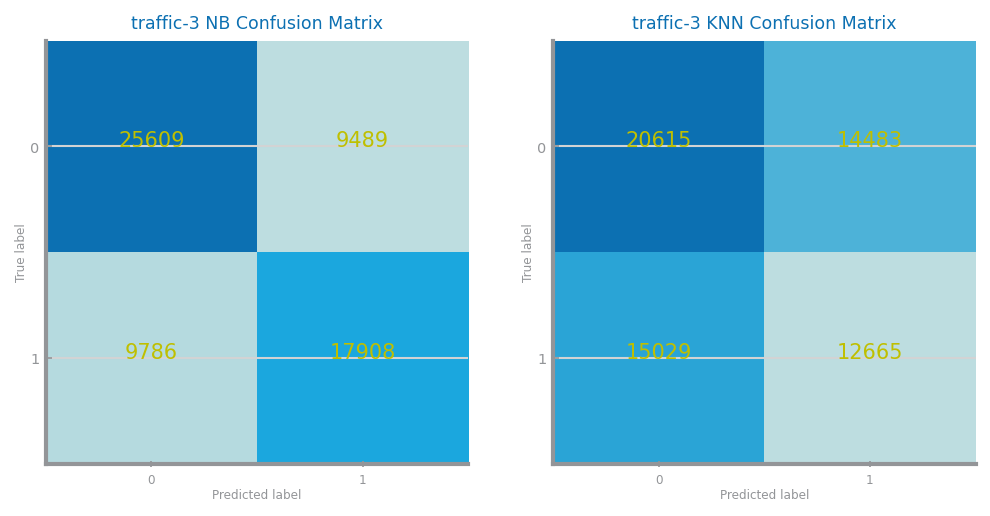

In [13]:
approach = "3"

# Approach 3: Combine both feature selection methods
# First drop low variance, then drop redundant from remaining

# Combine all variables to drop (avoiding duplicates)
all_vars2drop = list(set(low_var_vars2drop + redundant_vars2drop))
print(f"Total variables to drop ({len(all_vars2drop)}): {all_vars2drop}")

# Create dataset without both low variance and redundant variables
data_fs3 = input_df.drop(columns=all_vars2drop, inplace=False)
print(f"\nDataset shape: {input_df.shape} → {data_fs3.shape}")
print(f"Features removed: {input_df.shape[1] - data_fs3.shape[1]}")

# Evaluate
evaluate_and_plot(data_fs3, lab_folder, file_tag, approach, target_name)

### Feature Selection Summary

In [14]:
# Summary comparison
print("Feature Selection Comparison:")
print("=" * 60)
print(f"{'Approach':<30} {'Original':>10} {'Final':>10} {'Removed':>10}")
print("-" * 60)
print(f"{'Original dataset':<30} {input_df.shape[1]:>10} {'-':>10} {'-':>10}")
print(f"{'1. Low Variance':<30} {input_df.shape[1]:>10} {data_fs1.shape[1]:>10} {len(low_var_vars2drop):>10}")
print(f"{'2. Redundant Variables':<30} {input_df.shape[1]:>10} {data_fs2.shape[1]:>10} {len(redundant_vars2drop):>10}")
print(f"{'3. Combined':<30} {input_df.shape[1]:>10} {data_fs3.shape[1]:>10} {len(all_vars2drop):>10}")
print("=" * 60)

Feature Selection Comparison:
Approach                         Original      Final    Removed
------------------------------------------------------------
Original dataset                      151          -          -
1. Low Variance                       151        141         10
2. Redundant Variables                151        141         10
3. Combined                           151        135         16
